In [7]:
import cv2
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from skimage.feature import greycomatrix,greycoprops

In [8]:
img = cv2.imread('./test_chun1.jpeg',-1)
img2 = cv2.imread('./test_chun2.jpeg',-1)
img3 = cv2.imread('./test_jin.jpg',0)
scaler = MinMaxScaler()

In [9]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])
hist3 = cv2.calcHist([img3],[0],None,[256],[0,256])
hist = cv2.normalize(hist,hist).flatten()
hist2 = cv2.normalize(hist2,hist2).flatten()
hist3 = cv2.normalize(hist3,hist3).flatten()

In [71]:
x = cv2.compareHist(hist,hist2,cv2.HISTCMP_INTERSECT)
x

12.30379649349561

In [72]:
x2 = cv2.compareHist(hist,hist3,cv2.HISTCMP_INTERSECT)
x2

8.434235603457637

In [3]:
from matplotlib import pyplot as plt

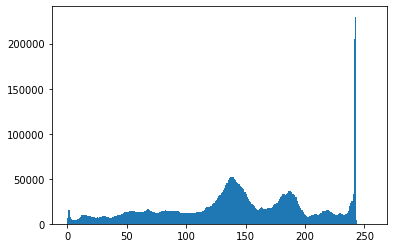

In [25]:
plt.hist(img.ravel(),256,[0,256]);
plt.show()

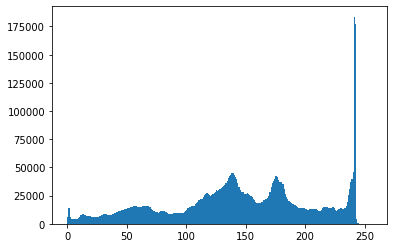

In [26]:
plt.hist(img2.ravel(),256,[0,256])
plt.show()

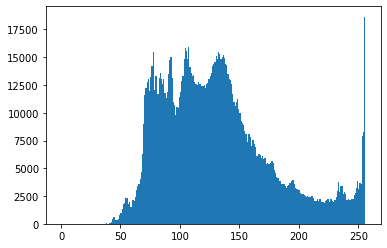

In [27]:
plt.hist(img3.ravel(),256,[0,256])
plt.show()

In [29]:
glcm= greycomatrix(img,[1],[0],symmetric = True,normed = True)
glcm2 = greycomatrix(img2,[1],[0],symmetric = True,normed = True)
glcm3 = greycomatrix(img3,[1],[0],symmetric = True,normed = True)

In [30]:
np.sum((glcm - glcm2)**2)**0.5

0.014879833860659279

In [31]:
np.sum((glcm2 - glcm3)**2)**0.5

0.056278304324028895

In [32]:
np.sum((glcm - glcm3)**2)**0.5

0.06663271778663998

In [10]:
def CombineSimilarity(img,centroid):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist2 = [ cv2.calcHist([x],[0],None,[256],[0,256]) for x in img2 ]
    hist = cv2.normalize(hist,hist).flatten()
    hist2 = [ cv2.normalize(x,x).flatten() for x in hist2]
    HisSimilarity = np.array([ cv2.compareHist(hist,x,cv2.HISTCMP_INTERSECT) for x in hist2])
    
    glcm= greycomatrix(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY),[1],[0],symmetric = True,normed = True)
    glcm2 = [ greycomatrix(cv2.cvtColor(x,cv2.COLOR_RGB2GRAY),[1],[0],symmetric = True,normed = True) for x in img2]
    GLCMSimilarity = np.sum((glcm - glcm2)**2)**0.5
    return 0.7*HisSimilarity + 0.3*GLCMSimilarity
    

In [35]:
def CombineSimilarity(img,centroid):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist = cv2.normalize(hist,hist).flatten()
    HisSimilarity = np.array([ cv2.compareHist(hist,x[1],cv2.HISTCMP_INTERSECT) for x in centroid])
    
    glcm= greycomatrix(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY),[1],[0],symmetric = True,normed = True)
    GLCMSimilarity = np.array([np.sum((glcm - x[2])**2)**0.5 for x in centroid])
    return 0.7*HisSimilarity + 0.3*GLCMSimilarity

In [37]:
def CombineSimilarity_single(img,img2):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])
    hist = cv2.normalize(hist,hist).flatten()
    hist2 = cv2.normalize(hist2,hist2).flatten()
    HisSimilarity = cv2.compareHist(hist,hist2,cv2.HISTCMP_INTERSECT)
    print(HisSimilarity)
    
    glcm= greycomatrix(img,[1],[0],symmetric = True,normed = True)
    glcm2 = greycomatrix(img2,[1],[0],symmetric = True,normed = True)
    GLCMSimilarity = np.sum((glcm - glcm2)**2)**0.5
    print(GLCMSimilarity)
    return 0.7*HisSimilarity + 0.3*GLCMSimilarity

In [38]:
CombineSimilarity_single(img,img2)

9.679427562602768
0.014879833860659279


6.780063243980135

In [39]:
CombineSimilarity_single(img,img3)

7.18405067097865
0.06663271778663998


5.048825285021047

In [40]:
CombineSimilarity_single(img,img)

10.504233768672748
0.0


7.352963638070923

# video clustering

In [39]:
vidcap = cv2.VideoCapture("./test_video.mp4")

test_image_set = []
count = 0
frame_count = 0

while(vidcap.isOpened):
    ret, image = vidcap.read()
    print(ret)
    if ret:
        count +=1
        if count%2 == 0:
            frame_count+=1
            test_image_set.append(image)
            print(f"frame {frame_count}")
    else:
            break
vidcap.release()

True
True
frame 1
True
True
frame 2
True
True
frame 3
True
True
frame 4
True
True
frame 5
True
True
frame 6
True
True
frame 7
True
True
frame 8
True
True
frame 9
True
True
frame 10
True
True
frame 11
True
True
frame 12
True
True
frame 13
True
True
frame 14
True
True
frame 15
True
True
frame 16
True
True
frame 17
True
True
frame 18
True
True
frame 19
True
True
frame 20
True
True
frame 21
True
True
frame 22
True
True
frame 23
True
True
frame 24
True
True
frame 25
True
True
frame 26
True
True
frame 27
True
True
frame 28
True
True
frame 29
True
True
frame 30
True
True
frame 31
True
True
frame 32
True
True
frame 33
True
True
frame 34
True
True
frame 35
True
True
frame 36
True
True
frame 37
True
True
frame 38
True
True
frame 39
True
True
frame 40
True
True
frame 41
True
True
frame 42
True
True
frame 43
True
True
frame 44
True
True
frame 45
True
True
frame 46
True
True
frame 47
True
True
frame 48
True
True
frame 49
True
True
frame 50
True
True
frame 51
True
True
frame 52
True
True
frame 53
Tr

In [40]:
class Clustering:
    def __init__(self,train_x):
        self.numCluster = 1
        self.Cluster = []
        self.centroid = []
        self.a = 6.0
        self.learn(train_x)
    def learn(self,train_x):
        self.Cluster.append([train_x[0]])
        hist = cv2.calcHist([train_x[0]],[0],None,[256],[0,256])
        self.centroid.append([train_x[0],cv2.normalize(hist,hist).flatten(),
                            greycomatrix(cv2.cvtColor(train_x[0],cv2.COLOR_RGB2GRAY),[1],[0],symmetric = True,normed = True)])
        for idx,x in enumerate(train_x[1:]):
            result = CombineSimilarity(x,self.centroid)
            s = np.max(result)
            maxidx = np.argmax(result)
            print(f'{s} ')
            if(s > self.a):
                print(f'Cluster idx : {maxidx}')
                self.Cluster[maxidx].append(x)
                numFrame = len(self.Cluster[maxidx])
                hist = cv2.calcHist([self.Cluster[maxidx][numFrame//2]],[0],None,[256],[0,256])
                self.centroid[maxidx] = [self.Cluster[maxidx][numFrame//2],cv2.normalize(hist,hist).flatten(),
                                         greycomatrix(cv2.cvtColor(self.Cluster[maxidx][numFrame//2],cv2.COLOR_RGB2GRAY),[1],[0],symmetric = True,normed = True)]
            else:
                print(f'Cluster idx : {self.numCluster}')
                self.Cluster.append([x])
                self.numCluster+=1
                hist = cv2.calcHist([x],[0],None,[256],[0,256])
                self.centroid.append([x,cv2.normalize(hist,hist).flatten(),
                            greycomatrix(cv2.cvtColor(x,cv2.COLOR_RGB2GRAY),[1],[0],symmetric = True,normed = True)])


In [41]:
cl = Clustering(test_image_set)

5.957336332274748 
Cluster idx : 1
5.820820502410322 
Cluster idx : 2
5.764163916207373 
Cluster idx : 3
5.689494684887781 
Cluster idx : 4
5.668430385194835 
Cluster idx : 5
5.593870942926287 
Cluster idx : 6
5.543987923172604 
Cluster idx : 7
5.540677285640648 
Cluster idx : 8
5.493385621790115 
Cluster idx : 9
5.3868896875227135 
Cluster idx : 10
5.3735676262646574 
Cluster idx : 11
5.331273797793678 
Cluster idx : 12
5.38998808324195 
Cluster idx : 13
5.381388008637906 
Cluster idx : 14
5.371873478461454 
Cluster idx : 15
5.328080139607286 
Cluster idx : 16
5.329979452863629 
Cluster idx : 17
5.288860997455159 
Cluster idx : 18
5.222740581313544 
Cluster idx : 19
5.262373121013777 
Cluster idx : 20
5.269448754593032 
Cluster idx : 21
5.289206518913302 
Cluster idx : 22
5.482122255536453 
Cluster idx : 23
5.756258895279101 
Cluster idx : 24
7.031718901954828 
Cluster idx : 24
7.247357722789325 
Cluster idx : 24
6.887788831730867 
Cluster idx : 24
6.607567911064102 
Cluster idx : 24


In [42]:
count = 0
for i in range(len(cl.centroid)):
    if len(cl.Cluster[i]) >= len(test_image_set)*0.1:
        print(i)
        cv2.imwrite('test_image_' + str(count) + '.jpg',cl.centroid[i][0])
        count += 1

25
26
